In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import geoplot.crs as ccrs
from geoplot import geoplot as gplt
%matplotlib inline

In [3]:
# Shim to download the dataset being used here, if it has not been downloaded already.
# cf. https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
import os

if not os.path.isfile("./data/NYPD Motor Vehicle Collisions.csv"):
    import requests
    with open("./data/NYPD Motor Vehicle Collisions.csv", "w") as f:
        f.write(requests.get("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD").text)

In [4]:
cdata = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)

In [5]:
def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(lat, long)

collisions = gpd.GeoDataFrame(cdata.head(1000), geometry=cdata.head(1000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

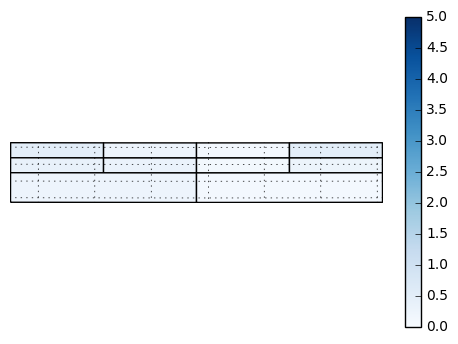

In [24]:
# All OK now on both Windows and Mac OSX.
gplt.aggplot(collisions.head(1000), projection=ccrs.AlbersEqualArea(), hue='NUMBER OF PERSONS INJURED',
             nmax=100, cmap='Blues')